### Question a

Maksimal Hs for Tp = 8.4 er 5.8


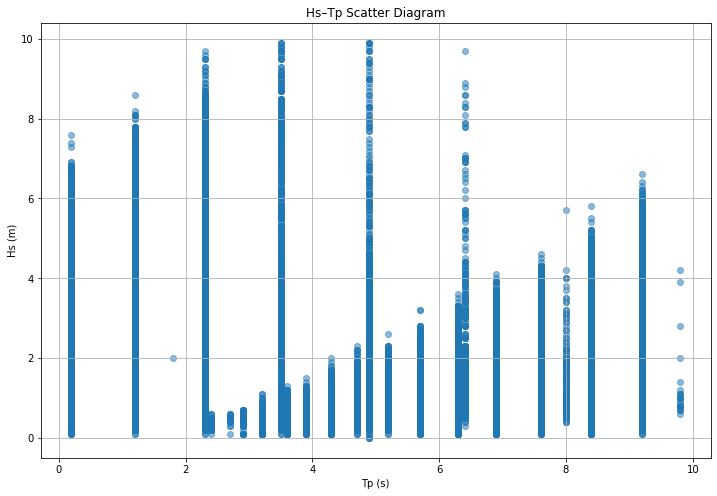

The wavenumber is approximately: 0.05237019714162759 rad/m  and waveleng= 119.9763539210598


In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 07:38:46 2024

@author: mostafa
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_fwf('NORA10_5674N_0501E.txt', skiprows=3)
max_tp = 8.4

# print()
hs_col_lab = df.columns[16]
tp_col_label = df.columns[17]
max_tp_indices = df[df[tp_col_label] == max_tp].index
max_Hs = df.loc[max_tp_indices, hs_col_lab].max()

print("Maximum Hs for Tp = {} er {}".format(max_tp, max_Hs))


# Bruk matplotbib for å plotte et spredningsdiagram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True)
plt.scatter(df[tp_col_label], df[hs_col_lab], alpha=0.5)  # alpha styrer punktenes gjennomsiktighet
plt.xlabel('Tp (s)')   # X-aksens etikett
plt.ylabel('Hs (m)')   # Y-aksens etikett
plt.title('Hs–Tp Scatter Diagram')  # Tittelen på plottet
plt.grid(True)         # Legger til et rutenett
fig.savefig('./figures/Hs–Tp scatter diagram.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show()             # Viser plottet



# T = 2*np.pi / (np.sqrt(g*((2*np.pi)/120)*np.tanh((2*np.pi*60)/120))) #For deep water np.tanh((2*np.pi*60)/120))) = 1
T = 2*np.pi / np.sqrt(g*((2*np.pi)/120))
print(T)
T= 8.76 #

omega = 2*np.pi/T  # angular frequency (rad/s)
h = 60  # water depth (m)
g = 9.81  # acceleration due to gravity (m/s^2)
D = 8 #Diameter (m)


# Define the dispersion relation function
def dispersion_relation(k):
    return omega**2 - g * k * np.tanh(k * h)

# Define the derivative of the dispersion relation function
def dispersion_relation_derivative(k):
    return -g * h * (1/np.cosh(k * h))**2 + g * h * k * (np.tanh(k * h))**2

# Newton-Raphson method to find the wavenumber
def find_wavenumber():
    k_guess = omega**2 / g  # initial guess
    max_iterations = 200
    tolerance = 1e-4

    for i in range(max_iterations):
        k_next = k_guess - dispersion_relation(k_guess) / dispersion_relation_derivative(k_guess)
        if abs(k_next - k_guess) < tolerance:
            return k_next
        k_guess = k_next

    return None

# Find the wavenumber using Newton-Raphson method
k_solution = find_wavenumber()

if k_solution is not None:
    print("The wavenumber is approximately:", k_solution, "rad/m", " and waveleng=", 2*np.pi/k_solution)
else:
    print("The wavenumber could not be determined within the specified tolerance.")




### Question b

In [11]:
#Morrision equation

T= 8.76
Cd = 0.7
Cm = 1.0
rho = 1025
h = 60
D = 8

def morrison_equation(Cm, Cd, rho, D, T, k_solution, max_Hs, h):
    
    
    def drag_inertial(z):
        A = max_Hs/2
        u = A * omega * np.cosh(k_solution * (h + z)) / np.cosh(k_solution * h) #np.cos(omega * time)=1 for max value  a/2?
        acceleration = (-A) * omega**2 * np.cosh(k_solution * (h + z)) / np.cosh(k_solution * h) #np.sin(omega * time) = 1 as well for max even if t is diffferetn to get 1 for them

        F_inertial =  rho * Cm * (np.pi * D**2 / 4) * acceleration
        F_drag = 0.5 * rho * Cd * D * u**2

        return F_inertial, F_drag
    F_i = 0
    F_d = 0
    dz = 60/1000
    for i in range(1000):
        z = -h + i *dz
        delta_F_i, delta_F_d = drag_inertial(z) 
        # F_i, F_d += drag_inertial(z=i)
        F_i += delta_F_i * dz
        F_d += delta_F_d * dz

    

    return F_i, F_d
# d = 60
F_i, F_d = morrison_equation(Cm, Cd, rho, D, T, k_solution, max_Hs, h)
print(f"F_inertial: {F_i/1000}, F_drag: {F_d/1000}")

F_horizontal = (F_i + F_d)/1000
print(f'F_horizontal: {F_horizontal}')



z_moment = -h/2

Moment_total = F_horizontal * z_moment


print(f"The overturning moment about the sea bottom level is {Moment_total} kNm")

#Inertial larger than drag, often large numbers in morrison equation


F_inertial: -6430.114867339843, F_drag: 745.0418482134522
F_horizontal: -5685.073019126391
The overturning moment about the sea bottom level is 170552.19057379174 kNm


Question e

In [19]:
#The Keulegan–Carpenter (KC) number is equivalent to H/D

# Maximum velocity (simplified for deep water)
# U_max = (np.pi * max_Hs) / T

# KC number
# KC = U_max * T / D

KC = max_Hs/D #Liten drag, stor inertial
print(f"KC number: {KC}")

KC = np.pi * D / (2*np.pi/k_solution) #Wavelength = 2*np.pi/k_solution = 120
print(f"πD/L: {KC}")



KC number: 0.725
πD/L: 0.20948078856651037
